In [1]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/telinwu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/telinwu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/telinwu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/telinwu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [140]:
from ipywidgets import Video
import numpy as np
import json
import glob
import os
import nltk
from nltk.stem import WordNetLemmatizer
import datetime
wn = WordNetLemmatizer()
import spacy
en = spacy.load('en_core_web_sm')
import matplotlib.pyplot as plt

# Summary inspection

In [3]:
data_root = "/local1/hu528/ego4d_data/v1/"
narrations_path = data_root + "annotations/narration.json"

In [4]:
def get_summary(path):
    video_id_to_summary = {}
    
    with open(narrations_path) as f:
        data = json.load(f)
        for key in data:
            if "narration_pass_1" not in data[key]:
                continue
            summaries = data[key]["narration_pass_1"]["summaries"]
#             print(key, summaries)
            summary = None
            if summaries:
                summary = ""
                for each in summaries:
                    s = each["summary_text"]
#                     print(each)
                    summary += s
                video_id_to_summary[key] = summary
    return video_id_to_summary

In [5]:
video_id_to_summary = get_summary(narrations_path)
# print(video_id_to_summary)

In [6]:
sentence = "ran"
doc = en(sentence)

for each in doc:
    print(each.pos_)
    print(each.lemma_)
    print(each.is_stop)

VERB
run
False


In [7]:
def get_summary_distribution(video_id_to_summary, keytype):
#     print(video_id_to_summary["876dad36-879c-42eb-977d-b500f7c141d3"])   
#     print(video_id_to_summary[list(video_id_to_summary.keys())[1]])

    bar_data = {}
    for summary in video_id_to_summary.values():
    #         print(summary)
        if not summary:
            continue
        else:
            text = en(summary.lower())
            stop = ["c", "summary", "#", "y", "y.", "x", "x.", "b", "z", "d"]
            
            for each in text:
#                 print(each.lemma_, each.pos_)
                if keytype == "N":
                    if each.pos_ in ("NOUN", "PROPN") and each.lemma_ not in stop:
                        if each.lemma_ in bar_data:
                            bar_data[each.lemma_] += 1
                        else:
                            bar_data[each.lemma_] = 1
                if keytype == "V":
                    if each.pos_ == "VERB":
                        if each.lemma_ in bar_data:
                            bar_data[each.lemma_] += 1
                        else:
                            bar_data[each.lemma_] = 1

    sorted_bar_data = sorted(bar_data.items(), key=lambda kv: kv[1], reverse = True)
    return sorted_bar_data

In [8]:
sorted_bar_data = get_summary_distribution(video_id_to_summary, "V")
# sorted_bar_data

In [9]:
sorted_bar_data = get_summary_distribution(video_id_to_summary, "N")
# sorted_bar_data

In [10]:
x_data = [data[0] for data in sorted_bar_data]
y_data = [data[1] for data in sorted_bar_data]

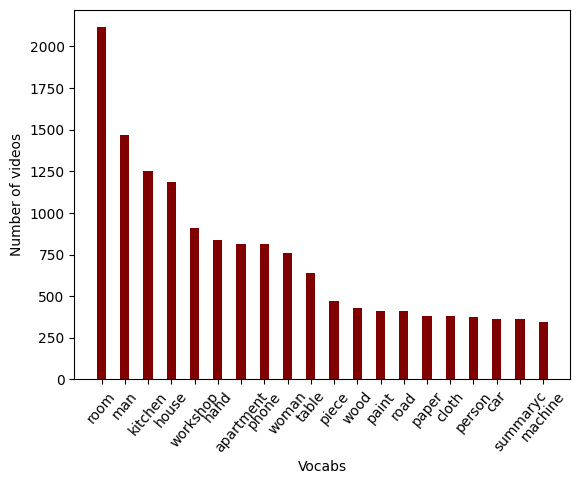

In [11]:
plt.bar(x_data[:20], y_data[:20], color ='maroon', width = 0.4)
plt.xticks(rotation = 50)
plt.xlabel("Vocabs")
plt.ylabel("Number of videos")
plt.show()

In [59]:
all_video_ids = sorted(list(video_id_to_summary.keys()))

In [63]:
random_video_id = np.random.choice(all_video_ids)
print("Video ID: {}".format(random_video_id))
print(video_id_to_summary[random_video_id])

Video ID: 88f02a8b-c819-4b13-ae17-e3accdd047d3
#Summary, C was outside, walked around and moved the hand 


In [98]:
video_root = "/local1/jrbronkar/ego4d_videos/v1/full_scale/"
downloaded_video_ids = {
    x.split("/")[-1].split(".")[0]: x for x in glob.glob(os.path.join(video_root, "*.mp4"))
}

random_video_id = np.random.choice(sorted(list(downloaded_video_ids.keys())))
print("Video ID: {}".format(random_video_id))
print(downloaded_video_ids[random_video_id])
print(video_id_to_summary[random_video_id])

Video ID: fdf36515-a08a-4575-9a79-65d0ec260cc7
/local1/jrbronkar/ego4d_videos/v1/full_scale/fdf36515-a08a-4575-9a79-65d0ec260cc7.mp4
#Summary C was in the house, drew on the sheet of paper with the pencil, stared at the drawing and operated the phone


In [99]:
Video.from_file(downloaded_video_ids[random_video_id])

Video(value=b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x0b\xd4\x9fM...')

Findings:

We can use the following keywords to ***filter*** things (most likely):
* "interact"
* "game"

We can use the following keywords to ***include*** things (most likely):
* "kitchen"

# Query sample video containing keywords

In [25]:
video_root = "/local1/jrbronkar/ego4d_videos/v1/full_scale/"
video_id_to_summary = get_summary(narrations_path)

In [16]:
def query_sample_video(keyword):
    uid_idx = []
    
    for uid in video_id_to_summary:
#         print(video_id_to_summary[uid])
        
        if keyword in nltk.word_tokenize(video_id_to_summary[uid]):
            print(video_id_to_summary[uid])
            uid_idx.append(uid)
        
    return uid_idx

In [17]:
query_sample_video("dices")

#summary. C was in a room with person X, rolled dices and played a card game. 
#summary C was in the house, picked cards on the table, put dices on the board, wrote on a paper with a pen and woman Y moved #unsure on the board
#Summary C was in the house with lady P ,lady Y ,man X used dices,cities ,roads played catan settler board game and walked out of the house
C stands in kitchen, C adjusts camera, C dices vegetables
#SummaryC was in kitchen. C prepared cheese sauce. C stirred the sauce with the chop sticks. #summary. 


['37f4000f-e934-4799-957d-e89dc504fd07',
 '0a47c74a-dad9-42d5-b937-0f375490f034',
 '88a344b7-fb59-43f9-b25e-554ae127d39f',
 'e3c805ff-3afc-4275-9e4d-b91937aeb642']

In [18]:
video_id_to_summary["0a47c74a-dad9-42d5-b937-0f375490f034"]

'#summary C was in the house, picked cards on the table, put dices on the board, wrote on a paper with a pen and woman Y moved #unsure on the board'

In [19]:
from ipywidgets import Video
Video.from_file(video_root + "0a47c74a-dad9-42d5-b937-0f375490f034.mp4", width=320, height=320)

Video(value=b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x13\x11\xdf\xc5mdat\xde…

In [96]:
Video.from_file(video_root + "0a47c74a-dad9-42d5-b937-0f375490f034.mp4")

# Chunk full-scale video to clips by narrations

In [32]:
class Narration:
    def __init__(self, text, begin_timestamp, end_timestamp=None):
        self.text = text
        self.begin = begin_timestamp
        self.end = end_timestamp

In [33]:
import json
import os
narration_objs = []
narrations_path = data_root + "/annotations/narration.json"
key = "a67789f8-3788-4a8d-aba8-9b2c2945d457"
with open(narrations_path) as f:
    data = json.load(f)
    print("hi")
    #print(data[key])
    narrations = data[key]["narration_pass_1"]["narrations"]
    #print(narrations)
    for narration in narrations:
        if narration_objs:
            narration_objs[-1].end = narration["timestamp_sec"]
        narration_objs.append(Narration(narration["narration_text"],narration["timestamp_sec"]))

hi


In [34]:
for narration in narration_objs:
    print(narration.text)
    print(narration.begin)
    print(narration.end)
    print("#############")

#C C kneads dough with both hands
1058.0876952666665
1062.9511552666665
#############
#C C rolls dough with both hands
1062.9511552666665
1072.2738652666665
#############
#C C flips dough with both hands
1072.2738652666665
1073.3280252666666
#############
#C C kneads dough with both hands
1073.3280252666666
1075.0543352666666
#############
#C C rolls dough with both hands
1075.0543352666666
1088.0101052666664
#############
#C C transfers dough to stove
1088.0101052666664
1093.0607452666666
#############
#C C shoves wood into stove
1093.0607452666666
1100.2641852666666
#############
#C C adjusts dough on stove
1100.2641852666666
1101.6164052666666
#############
#C C stirs the pot
1101.6164052666666
1106.2856852666664
#############
#C C flips dough
1106.2856852666664
1108.1090052666666
#############
#C C adjusts cloth
1108.1090052666666
1110.4583852666665
#############
#C C kneads dough with both hands
1110.4583852666665
1119.9016452666665
#############
#C C flips dough
1119.901645266666

In [35]:
print(narration_objs[0].begin)
print(narration_objs[0].end)
print(narration_objs[0].text)

1058.0876952666665
1062.9511552666665
#C C kneads dough with both hands


Function to chunk a clip from beginning s to ending s
Function to delete

In [40]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

# os.mkdir("/local1/hu528/ego4d_data/v1/clips/" + key)

with open("/local1/hu528/ego4d_data/v1/clips/clips_id.txt", "w") as f:
    for i in range(len(narration_objs)):
        ffmpeg_extract_subclip("/local1/hu528/ego4d_data/v1/full_scale/" + key + ".mp4", 
                               narration_objs[i].begin, narration_objs[i].end, 
                               targetname = "/local1/hu528/ego4d_data/v1/clips/" + key + "_" + str(i) + ".mp4")
        f.write(key + "_" + str(i) + "\n")
        if i == 10:
            break

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [38]:
Video.from_file(data_root + "clips/" + key + "_1.mp4", width = 320, height = 320)

Video(value=b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x00/\xbd\xf2mdat!\x1a\x…

# Read in all clip_ids and random sampling

In [39]:
with open(data_root + "clips/clips_id.txt") as f:
    lines = f.readlines()

picked_clip_id = {}
for line in lines:
    print(line.strip())
    picked_clip_id[line.strip()] = False
    
picked_clip_id

a67789f8-3788-4a8d-aba8-9b2c2945d457_0
a67789f8-3788-4a8d-aba8-9b2c2945d457_1
a67789f8-3788-4a8d-aba8-9b2c2945d457_2
a67789f8-3788-4a8d-aba8-9b2c2945d457_3
a67789f8-3788-4a8d-aba8-9b2c2945d457_4
a67789f8-3788-4a8d-aba8-9b2c2945d457_5
a67789f8-3788-4a8d-aba8-9b2c2945d457_6
a67789f8-3788-4a8d-aba8-9b2c2945d457_7
a67789f8-3788-4a8d-aba8-9b2c2945d457_8
a67789f8-3788-4a8d-aba8-9b2c2945d457_9
a67789f8-3788-4a8d-aba8-9b2c2945d457_10
a67789f8-3788-4a8d-aba8-9b2c2945d457_11
a67789f8-3788-4a8d-aba8-9b2c2945d457_12


{'a67789f8-3788-4a8d-aba8-9b2c2945d457_0': False,
 'a67789f8-3788-4a8d-aba8-9b2c2945d457_1': False,
 'a67789f8-3788-4a8d-aba8-9b2c2945d457_2': False,
 'a67789f8-3788-4a8d-aba8-9b2c2945d457_3': False,
 'a67789f8-3788-4a8d-aba8-9b2c2945d457_4': False,
 'a67789f8-3788-4a8d-aba8-9b2c2945d457_5': False,
 'a67789f8-3788-4a8d-aba8-9b2c2945d457_6': False,
 'a67789f8-3788-4a8d-aba8-9b2c2945d457_7': False,
 'a67789f8-3788-4a8d-aba8-9b2c2945d457_8': False,
 'a67789f8-3788-4a8d-aba8-9b2c2945d457_9': False,
 'a67789f8-3788-4a8d-aba8-9b2c2945d457_10': False,
 'a67789f8-3788-4a8d-aba8-9b2c2945d457_11': False,
 'a67789f8-3788-4a8d-aba8-9b2c2945d457_12': False}

In [71]:
clip_id_length = len(lines)
rand_idx = np.random.randint(0, clip_id_length)
print(rand_idx)

0


In [72]:
narration_objs[rand_idx].text

'#C C kneads dough with both hands'

In [73]:
Video.from_file(data_root + "clips/" + "/" + lines[rand_idx].strip() + ".mp4", width=320, height=320)

Video(value=b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x00\x11\x17Imdat\xde\x0…

# Pick Data

In [124]:
pick_or_not = input("Pick this data (y/n)? ")
if pick_or_not == "Y" or pick_or_not == "y":
    picked_clip_id[lines[rand_idx].strip()] = True

Pick this data (y/n)? n


In [125]:
print(picked_clip_id)

{'0014331f-18b1-4200-b4cd-bf55a08aa4fe': False, '4bd538a2-36e8-4ebe-91e8-6ae348cc0a01': False, '986888f0-4a74-4e39-9932-bfbf5d1bf352': False, '9ad40169-07a2-4973-9278-bf2b2888ee89': False, 'c1d62e9a-e514-4e17-bdc4-3eb5676758c5': True, 'ea07d3d7-c0c7-4fcc-937e-b6872aef6537': False}


# Object State Change Inspection

In [22]:
import cv2
import pprint
from ipywidgets import Video

In [21]:
ls /local1/hu528/ego4d_data/v1/annotations/

av_test_unannotated.json            fho_sta_train.json
av_train.json                       fho_sta_val.json
av_val.json                         manifest.csv
fho_hands_test_unannotated.json     manifest.ver
fho_hands_train.json                moments_test_unannotated.json
fho_hands_val.json                  moments_train.json
fho_lta_taxonomy.json               moments_val.json
fho_lta_test_unannotated.json       narration.json
fho_lta_train.json                  narration_noun_taxonomy.csv
fho_lta_val.json                    narration_verb_taxonomy.csv
fho_oscc-pnr_test_unannotated.json  nlq_test_unannotated.json
fho_oscc-pnr_train.json             nlq_train.json
fho_oscc-pnr_val.json               nlq_val.json
fho_scod_test_unannotated.json      vq_test_unannotated.json
fho_scod_train.json                 vq_train.json
fho_scod_val.json                   vq_val.json
fho_sta_test_unannotated.json


In [14]:
annots_root = "/local1/hu528/ego4d_data/v1/annotations/"
curr_videos_root = "/local1/jrbronkar/ego4d_videos/v1/full_scale"

In [15]:
all_narrations_file = os.path.join(annots_root, "narration.json")

all_narrations = json.load(open(all_narrations_file))

In [16]:
scod_train_file = "fho_scod_train.json"
scod_train_file = os.path.join(annots_root, scod_train_file)

scod_val_file = "fho_scod_val.json"
scod_val_file = os.path.join(annots_root, scod_val_file)

In [17]:
scod_train_data = json.load(open(scod_train_file))
scod_val_data = json.load(open(scod_val_file))

scod_clips = scod_train_data["clips"] + scod_val_data["clips"]

In [18]:
downloaded_video_id_and_paths = {
    x.split(".mp4")[0]: os.path.join(curr_videos_root, x)
    for x in os.listdir(curr_videos_root) if ".mp4" in x
}
print(len(downloaded_video_id_and_paths))

779


In [19]:
downloaded_scod_clips = []

for scod_clip in scod_clips:
    video_uid = scod_clip["video_uid"]
    if video_uid in downloaded_video_id_and_paths:
        downloaded_scod_clips.append(scod_clip)

print(len(downloaded_scod_clips))

2114


In [20]:
def get_scod_clipped_narrations(
        scod_clip,
        all_narrations,
        downloaded_video_paths,
        narration_pass="narration_pass_1",
    ):
    # pprint.pprint(scod_clip)
    
    video_uid = scod_clip["video_uid"]
    clip_uid = scod_clip["clip_uid"]
    pre_frame = scod_clip["pre_frame"]
    pnr_frame = scod_clip["pnr_frame"]
    pos_frame = scod_clip["post_frame"]
    curr_narrations = all_narrations[video_uid][narration_pass]["narrations"]
    
    video_path = downloaded_video_paths[video_uid]

    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = float(frame_cnt) / float(fps)
    cap.release()
    
    obj_of_change = pnr_frame["bbox"][1]["structured_noun"]
    
    pre_frame_num = pre_frame["frame_number"]
    pnr_frame_num = pnr_frame["frame_number"]
    pos_frame_num = pos_frame["frame_number"]
    
    pre_frame_sec = round(pre_frame_num/fps, 2)
    pnr_frame_sec = round(pnr_frame_num/fps, 2)
    pos_frame_sec = round(pos_frame_num/fps, 2)
    
    clip_narrations = []
    closest_narrations = []
    for i in range(len(curr_narrations)):
        timestamp_sec = curr_narrations[i]["timestamp_sec"]
        timestamp_frame = curr_narrations[i]["timestamp_frame"]
        narration_text = curr_narrations[i]["narration_text"]
        if (
            timestamp_frame >= pre_frame_num
            and timestamp_frame <= pos_frame_num
        ):
            clip_narrations.append((
                timestamp_sec, timestamp_frame, narration_text
            ))
        
        closest_narrations.append((
            abs(timestamp_frame-pre_frame_num),
            timestamp_sec, timestamp_frame, narration_text,
        ))
        
    closest_narrations = sorted(closest_narrations)[:5]
    
    print("Object of change: {}".format(obj_of_change))
    print("FPS: {}".format(fps))
    print("Pre/PNR/Post frame = {} / {} / {}".format(pre_frame_num, pnr_frame_num, pos_frame_num))
    print("Pre/PNR/Post sec   = {} / {} / {}".format(pre_frame_sec, pnr_frame_sec, pos_frame_sec))
    
    closest_narrations = [(a, b, c) for _, a, b, c in closest_narrations]
    
    for a, b, c in closest_narrations:
        print("[{:.2f}]({}) {}".format(a, b, c))
    
    return clip_narrations, closest_narrations

"""
video_path = downloaded_video_id_and_paths[video_uid]
video_read_in = cv2.VideoCapture(video_path)
success, video_image = video_read_in.read()
video_frames = []
while success:
    video_frames.append(video_image)
    success, video_image = video_read_in.read()
print(len(video_frames))
"""

rand_idx = np.random.randint(0, len(downloaded_scod_clips))

scod_clip = downloaded_scod_clips[rand_idx]
video_uid = scod_clip["video_uid"]
print("Video UID: {}".format(video_uid))
clip_narrations, closest_narrations = get_scod_clipped_narrations(
    scod_clip,
    all_narrations,
    downloaded_video_id_and_paths,
    narration_pass="narration_pass_1",
)

Video UID: 1b204c9b-30da-47cc-b793-8813169e72c7
Object of change: None
FPS: 30
Pre/PNR/Post frame = 32264 / 32283 / 32303
Pre/PNR/Post sec   = 1075.47 / 1076.1 / 1076.77
[1076.02](32280) #C C moves the waste part of the onions aside
[1076.65](32299) #C C moves the knife
[1072.73](32181) #C C puts the onions together
[1079.05](32371) #C C picks up the garlic
[1071.35](32140) #C C puts the lid down


In [23]:
Video.from_file(
    os.path.join(
        curr_videos_root,
        "{}.mp4".format(video_uid),
    )
)

Video(value=b"\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08freeS\xa0\xfe'...")

In [22]:
video_path = os.path.join(
    curr_videos_root,
    "{}.mp4".format(video_uid),
)

cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = float(frame_cnt) / float(fps)
cap.release()

print("The fps of video `{}` is: {} of frame counts: {} and duration: {} sec.".format(video_path, fps, frame_cnt, duration))

The fps of video `/local1/jrbronkar/ego4d_videos/v1/full_scale/f97b9bb6-9afc-4743-899f-bfe483e88d97.mp4` is: 30 of frame counts: 42823 and duration: 1427.4333333333334 sec.


In [ ]:
from IPython.display import Image

Image(filename="../vids_tmp/1368.png") 

## STA

In [23]:
sta_annots_test = "fho_sta_val.json"
sta_annots_test = os.path.join(annots_root, sta_annots_test)
sta_annots = json.load(open(sta_annots_test))

In [49]:
print(sta_annots.keys())

annot_idx = 5
pprint.pprint(sta_annots["info"].keys())
noun_cats = {}
verb_cats = {}
for cat in sta_annots["noun_categories"]:
    noun_cats[cat["id"]] = cat["name"]
for cat in sta_annots["verb_categories"]:
    verb_cats[cat["id"]] = cat["name"]
pprint.pprint(sta_annots["info"]["video_metadata"][sta_annots["annotations"][annot_idx]["video_id"]])
for bbox_idx in range(len(sta_annots["annotations"][annot_idx]["objects"])):
    sta_annots["annotations"][annot_idx]["objects"][bbox_idx]["verb"] = \
        verb_cats[sta_annots["annotations"][annot_idx]["objects"][bbox_idx]["verb_category_id"]]
    sta_annots["annotations"][annot_idx]["objects"][bbox_idx]["noun"] = \
        noun_cats[sta_annots["annotations"][annot_idx]["objects"][bbox_idx]["noun_category_id"]]
pprint.pprint(sta_annots["annotations"][annot_idx])

dict_keys(['info', 'annotations', 'noun_categories', 'verb_categories'])
dict_keys(['description', 'version', 'split', 'include_annotations', 'video_metadata', 'year', 'date_created'])
{'fps': 30.0, 'frame_height': 1440, 'frame_width': 1920}
{'clip_frame': 599,
 'clip_id': 8,
 'clip_uid': '8d686451-cac9-4526-a022-b6eaf7d467b4',
 'frame': 599,
 'objects': [{'box': [1002.55, 1187.35, 1280.22, 1348.0],
              'noun': 'shoe_(boot,_sandal,_shoe,_slipper)',
              'noun_category_id': 66,
              'time_to_contact': 0.7333333333333333,
              'verb': 'take_(pick,_grab,_get)',
              'verb_category_id': 62}],
 'uid': 'cde41c4f-50d1-4910-9f2a-4c7b6987df92_0000599',
 'video_id': 'cde41c4f-50d1-4910-9f2a-4c7b6987df92'}


## OSCC

In [100]:
annots_root = "/local1/hu528/ego4d_data/v1/annotations/"
curr_videos_root = "/local1/jrbronkar/ego4d_videos/v1/full_scale"

In [101]:
all_narrations_file = os.path.join(annots_root, "narration.json")

all_narrations = json.load(open(all_narrations_file))

In [111]:
oscc_train_file = "fho_oscc-pnr_train.json"
oscc_train_file = os.path.join(annots_root, oscc_train_file)

oscc_val_file = "fho_oscc-pnr_val.json"
oscc_val_file = os.path.join(annots_root, oscc_val_file)

In [112]:
oscc_train_data = json.load(open(oscc_train_file))
oscc_val_data = json.load(open(oscc_val_file))

oscc_clips = oscc_train_data["clips"] + oscc_val_data["clips"]

In [113]:
downloaded_video_id_and_paths = {
    x.split(".mp4")[0]: os.path.join(curr_videos_root, x)
    for x in os.listdir(curr_videos_root) if ".mp4" in x
}
print(len(downloaded_video_id_and_paths))

779


In [122]:
downloaded_oscc_clips = []

for oscc_clip in oscc_clips:
    video_uid = oscc_clip["video_uid"]
    if video_uid in downloaded_video_id_and_paths:
        downloaded_oscc_clips.append(oscc_clip)

print(len(downloaded_oscc_clips))

true_oscc_indices = [idx for idx in range(len(downloaded_oscc_clips))
                     if downloaded_oscc_clips[idx]["state_change"] is True]
false_oscc_indices = [idx for idx in range(len(downloaded_oscc_clips))
                      if downloaded_oscc_clips[idx]["state_change"] is False]

9745
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540]
{'clip_id': '1805',
 'clip_uid': None,
 'parent_end_frame': 1675,
 'parent_end_sec': 55.83333206176758,
 'parent_start_frame': 1435,
 'parent_start_sec': 47.83333206176758,
 'pnr_frame': None,
 'state_change': False,
 'unique_id': '1805-47_86666488647461-55_86666488647461-1805',
 'video_uid': '9c59e912-2340-4400-b2df-7db3d4066723'}


In [149]:
def get_oscc_clipped_narrations(
        oscc_clip,
        all_narrations,
        downloaded_video_paths,
        narration_pass="narration_pass_1",
        show_name="show",
        get_clip=True,
        get_frames=True,
    ):
    # pprint.pprint(oscc_clip)
    
    video_uid = oscc_clip["video_uid"]
    clip_uid = oscc_clip["clip_uid"]
    parent_start_sec = oscc_clip["parent_start_sec"]
    parent_end_sec = oscc_clip["parent_end_sec"]
    parent_start_frame = oscc_clip["parent_start_frame"]
    parent_end_frame = oscc_clip["parent_end_frame"]
    curr_narrations = all_narrations[video_uid][narration_pass]["narrations"]
    
    video_path = downloaded_video_paths[video_uid]
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = float(frame_cnt) / float(fps)
    cap.release()
    
    clip_narrations = []
    closest_narrations = []
    for i in range(len(curr_narrations)):
        timestamp_sec = curr_narrations[i]["timestamp_sec"]
        timestamp_frame = curr_narrations[i]["timestamp_frame"]
        narration_text = curr_narrations[i]["narration_text"]
        if (
            timestamp_frame >= parent_start_frame
            and timestamp_frame <= parent_end_frame
        ):
            clip_narrations.append((
                timestamp_sec, timestamp_frame, narration_text
            ))
        
        closest_narrations.append((
            abs(timestamp_frame-parent_start_frame),
            timestamp_sec, timestamp_frame, narration_text,
        ))
        
    closest_narrations = sorted(closest_narrations)[:5]
    
    print("FPS: {}".format(fps))
    print("Start/End frame = {} / {}".format(parent_start_frame, parent_end_frame))
    print("Start/End sec   = {} / {}".format(parent_start_sec, parent_end_sec))
    
    closest_narrations = [(a, b, c) for _, a, b, c in closest_narrations]
    
    for a, b, c in closest_narrations:
        print("[{:.2f}]({}) {}".format(a, b, c))
        
    
    parent_start_timestamp = str(datetime.timedelta(seconds=parent_start_sec))
    parent_end_timestamp = str(datetime.timedelta(seconds=parent_end_sec))
    # print(parent_start_timestamp, parent_end_timestamp)

    # pre_timestamp_secs = math.floor(float(pre_timestamp.split(":")[-1]))
    # pos_timestamp_secs = math.ceil(float(pos_timestamp.split(":")[-1]))

    # pre_timestamp = ":".join(pre_timestamp.split(":")[:-1]) + ":" + str(pre_timestamp_secs)
    # pos_timestamp = ":".join(pos_timestamp.split(":")[:-1]) + ":" + str(pos_timestamp_secs)
    
    if os.path.exists("../modeling/media/{}.mp4".format(show_name)):
        os.remove("../modeling/media/{}.mp4".format(show_name))

    if get_clip:
        ffmpeg_video_cmd = (
            "/home/telinwu/ffmpeg-git-20220910-amd64-static/ffmpeg -ss {} -to {} "
            "-i {} -c copy -loglevel panic ../modeling/media/{}.mp4".format(
                parent_start_timestamp,
                parent_end_timestamp,
                video_path,
                show_name,
            )
        )
        os.system(ffmpeg_video_cmd)
        print("Executed command: {}".format(ffmpeg_video_cmd))
    
    if get_frames:
        raise NotImplementedError("Not done yet!")
    
    return clip_narrations, closest_narrations

In [163]:
# Checking state changes.
state_change_to_check = "false"  # "false", "either"
if state_change_to_check == "true":
    rand_idx = np.random.choice(true_oscc_indices)
elif state_change_to_check == "false":
    rand_idx = np.random.choice(false_oscc_indices)
else:
    rand_idx = np.random.choice(true_oscc_indices+false_oscc_indices)

oscc_clip = downloaded_oscc_clips[rand_idx]
pprint.pprint(oscc_clip)
video_uid = scod_clip["video_uid"]
print("Video UID: {}".format(video_uid))

clip_narrations, closest_narrations = get_oscc_clipped_narrations(
    oscc_clip,
    all_narrations,
    downloaded_video_id_and_paths,
    narration_pass="narration_pass_1",
    show_name="show_oscc",
    get_clip=True,
    get_frames=False,
)

Video.from_file(
    "../modeling/media/show_oscc.mp4"
)

{'clip_id': '1805',
 'clip_uid': None,
 'parent_end_frame': 577,
 'parent_end_sec': 19.233333587646484,
 'parent_start_frame': 337,
 'parent_start_sec': 11.233333587646484,
 'pnr_frame': None,
 'state_change': False,
 'unique_id': '1805-11_266666412353516-19_266666412353516-1805',
 'video_uid': '9c59e912-2340-4400-b2df-7db3d4066723'}
Video UID: 1b204c9b-30da-47cc-b793-8813169e72c7
FPS: 30
Start/End frame = 337 / 577
Start/End sec   = 11.233333587646484 / 19.233333587646484
[10.52](315) #C C fixes the lawn mower.
[6.51](195) #C C puts the lawn mower on.
[19.27](578) #C C puts on the gloves.
[0.01](0) #C C puts on the lawn mower.
[26.46](793) #C C cuts the grass with the lawn mower.
Executed command: /home/telinwu/ffmpeg-git-20220910-amd64-static/ffmpeg -ss 0:00:11.233334 -to 0:00:19.233334 -i /local1/jrbronkar/ego4d_videos/v1/full_scale/9c59e912-2340-4400-b2df-7db3d4066723.mp4 -c copy -loglevel panic ../modeling/media/show_oscc.mp4


Video(value=b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x01\xabH\x1a...')

# END